In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("C:/Users/User/Documents/UNI/3rd year/semester 2/ML/Final Project/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Count the number of duplicate rows based on all columns
num_duplicates = df1.duplicated().sum()

# Display the number of duplicate rows
print("Number of duplicate rows based on all columns:", num_duplicates)

Number of duplicate rows based on all columns: 529


In [5]:
# Find duplicate rows
duplicate_rows = df1[df1.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                  area_type   availability          location       size  \
971    Super built-up  Area  Ready To Move      Haralur Road      3 BHK   
1115   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1143   Super built-up  Area  Ready To Move       Vittasandra      2 BHK   
1290   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1394   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
...                     ...            ...               ...        ...   
13285  Super built-up  Area  Ready To Move      VHBCS Layout      2 BHK   
13299  Super built-up  Area         18-Dec        Whitefield      4 BHK   
13311            Plot  Area  Ready To Move  Ramamurthy Nagar  7 Bedroom   
13313  Super built-up  Area  Ready To Move       Uttarahalli      3 BHK   
13319  Super built-up  Area  Ready To Move      Doddathoguru      1 BHK   

       society   total_sqft  bath  balcony  price  
971    NRowse          1464   3

In [6]:
# Remove all duplicate rows based on all columns
df1 = df1.drop_duplicates()

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df1.shape)

Shape of cleaned DataFrame: (12791, 9)


EDA

In [7]:
df1['society'].unique()
#Doesn't make sense and hence can be removed
df1.drop('society', axis=1, inplace=True)

In [8]:
#availability doesn't provide much information as we don't know the year. Hence can be removed
df1.drop('availability', axis=1, inplace=True)

In [9]:
# Remove column 'area_type' from the DataFrame
df1 = df1.drop(columns=['area_type'])
print(df1)

                       location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13316             Richards Town      4 BHK       3600   5.0      NaN  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00

[12791 rows x 6 columns]


In [10]:
# Count the total number of records (rows) in the DataFrame
total_records = len(df1)

# Calculate the number of records with missing values
missing_records = df1.isnull().any(axis=1).sum()
print(missing_records)
# Calculate the percentage of missing records
percentage_missing_records = (missing_records / total_records) * 100

# Display the percentage of missing records
print(f"Percentage of missing records: {percentage_missing_records:.2f}%")

606
Percentage of missing records: 4.74%


In [11]:
# Remove rows with missing values
df1 = df1.dropna()

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df1)

Shape of cleaned DataFrame:                        location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13312                 Bellandur      2 BHK       1262   2.0      2.0   47.00
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00

[12185 rows x 6 columns]


In [12]:
#Location
unique_locations = df1['location'].unique()
num_unique_locations = len(unique_locations)
print("Number of unique locations:", num_unique_locations)
print("Unique locations:", unique_locations)

Number of unique locations: 1265
Unique locations: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [13]:
#cleaning of locations

# Remove leading and trailing whitespaces
df1['location'] = df1['location'].str.strip()

# Convert text to lowercase
df1['location'] = df1['location'].str.lower()

# Print the number of unique locations and unique locations after cleaning
unique_locations_cleaned = df1['location'].unique()
num_unique_locations_cleaned = len(unique_locations_cleaned)
print("Number of unique locations after cleaning:", num_unique_locations_cleaned)
print("Unique locations after cleaning:", unique_locations_cleaned)

Number of unique locations after cleaning: 1244
Unique locations after cleaning: ['electronic city phase ii' 'chikka tirupathi' 'uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'havanur extension'
 'abshot layout']


In [14]:
#Create new variable bedroom to indicate number of bedroom
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.bedroom.unique()
# Create new variable 'bedroom' to indicate the number of bedrooms


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
# Convert 'bath' and 'balcony' columns to int
df1['bath'] = df1['bath'].astype(int)
df1['balcony'] = df1['balcony'].astype(int)
df1['bedroom'] = df1['bedroom'].astype(np.int32)
print(df1.dtypes)

location       object
size           object
total_sqft     object
bath            int32
balcony         int32
price         float64
bedroom         int32
dtype: object


In [16]:
def convert_to_sqft(total_sqft):
    try:
        # First, check if the value is a range
        if '-' in total_sqft:
            range_values = total_sqft.split('-')
            avg_sqft = (float(range_values[0]) + float(range_values[1])) / 2
            return avg_sqft
        # If the value contains 'Sq. Yards', convert to square feet (1 Sq. Yard = 9 Sq. Feet)
        elif 'Sq. Yards' in total_sqft:
            return float(total_sqft.split('Sq. Yards')[0]) * 9
        # If the value contains 'Grounds', convert to square feet (1 Grounds = 2400 Sq. Feet)
        elif 'Grounds' in total_sqft:
            return float(total_sqft.split('Grounds')[0]) * 2400
        # If the value contains 'Guntha', convert to square feet (1 Guntha = 1089 Sq. Feet)
        elif 'Guntha' in total_sqft:
            return float(total_sqft.split('Guntha')[0]) * 1089
        # If the value contains 'Acres', convert to square feet (1 Acres = 43560 Sq. Feet)
        elif 'Acres' in total_sqft:
            return float(total_sqft.split('Acres')[0]) * 43560
        # If the value contains 'Sq. Meter', convert to square feet (1 Sq. Meter = 10.764 Sq. Feet)
        elif 'Sq. Meter' in total_sqft:
            return float(total_sqft.split('Sq. Meter')[0]) * 10.764
        else:
            return float(total_sqft)
    except:
        return np.nan  # return NaN for invalid values


In [17]:
# Define a function to round numbers to two decimal places without scientific notation
def round_to_two_decimal_places(x):
    return round(x, 2)

# Apply the conversion function to the 'total_sqft' column
df1['total_sqft'] = df1['total_sqft'].apply(convert_to_sqft)

# Round the converted values to two decimal places
df1['total_sqft'] = df1['total_sqft'].apply(round_to_two_decimal_places)

# Print unique values after conversion
print("Unique values in 'total_sqft' after conversion:")
print(df1['total_sqft'].unique())

Unique values in 'total_sqft' after conversion:
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [18]:
df1['total_sqft'] = df1['total_sqft'].astype(float)

In [19]:
print(df1.dtypes)

location       object
size           object
total_sqft    float64
bath            int32
balcony         int32
price         float64
bedroom         int32
dtype: object


In [20]:
# Remove column 'size' from the DataFrame
df1 = df1.drop(columns=['size'])
print(df1)

                       location  total_sqft  bath  balcony   price  bedroom
0      electronic city phase ii      1056.0     2        1   39.07        2
1              chikka tirupathi      2600.0     5        3  120.00        4
2                   uttarahalli      1440.0     2        3   62.00        3
3            lingadheeranahalli      1521.0     3        1   95.00        3
4                      kothanur      1200.0     2        1   51.00        2
...                         ...         ...   ...      ...     ...      ...
13312                 bellandur      1262.0     2        2   47.00        2
13314         green glen layout      1715.0     3        3  112.00        3
13315                whitefield      3453.0     4        0  231.00        5
13317     raja rajeshwari nagar      1141.0     2        1   60.00        2
13318           padmanabhanagar      4689.0     4        1  488.00        4

[12185 rows x 6 columns]


In [21]:
# Remove rows with missing values
df1 = df1.dropna()
missing_values_count = df1.isnull().sum()

print("Number of missing values in each feature:")
print(missing_values_count)

Number of missing values in each feature:
location      0
total_sqft    0
bath          0
balcony       0
price         0
bedroom       0
dtype: int64


In [22]:
# Specify the features (X) and target variable (y)
X = df1.drop(columns=['price'])  # Drop the target column to get features
y = df1['price']  # Target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9746, 5)
Shape of X_test: (2437, 5)
Shape of y_train: (9746,)
Shape of y_test: (2437,)


#MORE CLEANING (Outlier Removal)

In [23]:
location_stats = X_train['location'].value_counts(ascending=False)
location_stats

location
whitefield                407
sarjapur  road            274
electronic city           234
kanakpura road            201
thanisandra               182
                         ... 
6th block rajaji nagar      1
sampige layout              1
uvce layout                 1
shanthi layout              1
thirumalashettyhally        1
Name: count, Length: 1147, dtype: int64

In [24]:
len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
cooke town                10
bommenahalli              10
sultan palaya             10
kadubeesanahalli          10
poorna pragna layout      10
                          ..
6th block rajaji nagar     1
sampige layout             1
uvce layout                1
shanthi layout             1
thirumalashettyhally       1
Name: count, Length: 951, dtype: int64

In [25]:
X_train.location = X_train.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(X_train.location.unique())

197

In [26]:
# Find locations in test data that are not present in training data
test_locations_not_in_train = set(X_test['location']) - set(X_train['location'])

# Identify locations in test data that are in the 'other' category in training data
test_locations_to_other = set(X_test['location']) - set(location_stats.index)

# Update those locations in the test data to 'other'
X_test.loc[X_test['location'].isin(test_locations_not_in_train.union(test_locations_to_other)), 'location'] = 'other'

# Check the unique locations in the updated test data
print("Unique locations in updated test data:", len(X_test['location'].unique()))

Unique locations in updated test data: 192


In [27]:
# Concatenate training and test data to ensure consistent encoding
combined_data = pd.concat([X_train, X_test])

# Perform one-hot encoding on the combined 'location' column
combined_data_encoded = pd.get_dummies(combined_data, columns=['location'], drop_first=True)

# Remove 'location_' from column names
combined_data_encoded.columns = combined_data_encoded.columns.str.replace('location_', '')

# Split the combined data back into training and test sets
X_train_encoded = combined_data_encoded.iloc[:len(X_train)]
X_test_encoded = combined_data_encoded.iloc[len(X_train):]

In [28]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.
#8 such records can be removed
# Concatenate training_X and training_y into a single DataFrame
training_data = pd.concat([X_train_encoded, y_train], axis=1)

In [29]:
training_data =training_data.drop(training_data[training_data.bath > training_data.bedroom + 2].index)

In [30]:
#normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
#If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
#We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft
#523 records are removed
training_data = training_data [~(training_data .total_sqft/training_data .bedroom < 300)]

In [31]:
#Price(in rupees) per square feet
training_data ["price_per_sqft"] = training_data ["price"]*100000/training_data ["total_sqft"]
training_data .head()

,total_sqft,bath,balcony,bedroom,1st phase jp nagar,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur,price,price_per_sqft
12333,1500.0,2,0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,70.00,4666.666667
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,225.00,6081.081081
11722,1452.0,2,2,3,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,46.29,3188.016529
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,39.50,3787.152445
6738,1105.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,90.00,8144.796380


In [32]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers based on price_per_sqft column
training_data  = remove_outliers_iqr(training_data , 'price_per_sqft')

training_data .shape
#744 records were removed

(8471, 202)

In [33]:
training_data.head()

,total_sqft,bath,balcony,bedroom,1st phase jp nagar,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur,price,price_per_sqft
12333,1500.0,2,0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,70.00,4666.666667
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,225.00,6081.081081
11722,1452.0,2,2,3,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,46.29,3188.016529
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,39.50,3787.152445
6738,1105.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,90.00,8144.796380


In [34]:
# remove price_per_sqft column
training_data = training_data.drop('price_per_sqft', axis=1)

In [35]:
training_data.head()

,total_sqft,bath,balcony,bedroom,1st phase jp nagar,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vidyaranyapura,vijayanagar,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur,price
12333,1500.0,2,0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,70.00
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,225.00
11722,1452.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,46.29
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,39.50
6738,1105.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,90.00


In [36]:
# X_train and y_train are your original training features and labels

X_training = training_data.drop('price', axis=1)  # Features (all columns except the response column)
y_training = training_data['price']  # Labels (response column)

In [37]:
X_training.head()

,total_sqft,bath,balcony,bedroom,1st phase jp nagar,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,varthur road,vidyaranyapura,vijayanagar,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
12333,1500.0,2,0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11722,1452.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6738,1105.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
y_training.head()

12333     70.00
114      225.00
11722     46.29
4770      39.50
6738      90.00
Name: price, dtype: float64

In [39]:
X_train_scaled=X_training

In [40]:
X_test_scaled=X_test_encoded

In [41]:
# Natural logarithm (base e) transformation for y_train
Y_train_log = np.log(y_training)
Y_test_transformed = np.log(y_test)

In [42]:
#XGBOOST(without tuning)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


# Create an instance of XGBRegressor with default parameters
xgb_model_default = XGBRegressor()

# Fit the model
xgb_model_default.fit(X_train_scaled, Y_train_log)

# Print the score (negative mean squared error)
score_default = xgb_model_default.score(X_train_scaled, Y_train_log)
print("Score for XGBoost (Default):", score_default)

# Predictions on the training set
xgb_train_predictions = xgb_model_default.predict(X_train_scaled)

# Calculate training MSE
xgb_train_mse = mean_squared_error(Y_train_log, xgb_train_predictions)

# Predictions on the test set
xgb_test_predictions = xgb_model_default.predict(X_test_scaled)

# Calculate test MSE
xgb_test_mse = mean_squared_error(Y_test_transformed, xgb_test_predictions)

# Calculate RMSE for training predictions
xgb_train_rmse = mean_squared_error(Y_train_log, xgb_train_predictions, squared=False)

# Calculate RMSE for test predictions
xgb_test_rmse = mean_squared_error(Y_test_transformed, xgb_test_predictions, squared=False)

# Calculate MAE for training predictions
xgb_train_mae = mean_absolute_error(Y_train_log, xgb_train_predictions)

# Calculate MAE for test predictions
xgb_test_mae = mean_absolute_error(Y_test_transformed, xgb_test_predictions)

# Calculate R^2 for training predictions
xgb_train_r2 = r2_score(Y_train_log, xgb_train_predictions)

# Calculate R^2 for test predictions
xgb_test_r2 = r2_score(Y_test_transformed, xgb_test_predictions)

# Calculate the difference between train and test MSE
xgb_mse_difference = xgb_train_mse - xgb_test_mse

# Print the results
print("XGBoost Training MSE:", xgb_train_mse)
print("XGBoost Test MSE:", xgb_test_mse)
print("XGBoost Regression Train RMSE:", xgb_train_rmse)
print("XGBoost Regression Test RMSE:", xgb_test_rmse)
print("XGBoost Regression Train MAE:", xgb_train_mae)
print("XGBoost Regression Test MAE:", xgb_test_mae)
print("XGBoost Regression Train R^2:", xgb_train_r2)
print("XGBoost Regression Test R^2:", xgb_test_r2)
print("XGBoost Train-Test MSE Difference:", xgb_mse_difference)

Score for XGBoost (Default): 0.8515120098007107
XGBoost Training MSE: 0.04932279033911273
XGBoost Test MSE: 0.15218773497832694
XGBoost Regression Train RMSE: 0.22208734844450895
XGBoost Regression Test RMSE: 0.39011246452571463
XGBoost Regression Train MAE: 0.16844737049497738
XGBoost Regression Test MAE: 0.2654490391349399
XGBoost Regression Train R^2: 0.8515120098007107
XGBoost Regression Test R^2: 0.6734676626933276
XGBoost Train-Test MSE Difference: -0.10286494463921421


In [44]:
# Extract feature importances
feature_importances = xgb_model_default.feature_importances_

# Create a dictionary with feature names and their importance values
feature_importance_dict = dict(zip(X_train_scaled.columns, feature_importances))

# Sort the dictionary by importance values in descending order
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importance values
print("Feature Importance:")
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")


Feature Importance:
total_sqft: 0.04819784313440323
btm layout: 0.02782309241592884
electronic city phase ii: 0.023647919297218323
begur: 0.018644705414772034
chandapura: 0.017556900158524513
sarjapur: 0.016226397827267647
koramangala: 0.015318124555051327
basavangudi: 0.014120912179350853
raja rajeshwari nagar: 0.013756033033132553
rajaji nagar: 0.013592158444225788
ananth nagar: 0.01282375305891037
electronic city: 0.012279198504984379
attibele: 0.01185609120875597
hebbal: 0.01185451541095972
indira nagar: 0.011549408547580242
begur road: 0.011440005153417587
thanisandra: 0.011060022749006748
kanakpura road: 0.010928184725344181
uttarahalli: 0.010816441848874092
jp nagar: 0.010730134323239326
kammasandra: 0.010492668487131596
anekal: 0.010397778823971748
bommasandra industrial area: 0.010278867557644844
lakshminarayana pura: 0.01001321617513895
tc palaya: 0.009898324497044086
kundalahalli: 0.009763983078300953
bedroom: 0.009725134819746017
nagasandra: 0.009465459734201431
budigere: 0

In [46]:
# Extract feature importances
feature_importances = xgb_model_default.feature_importances_

# Create a dictionary with feature names and their importance values
feature_importance_dict = dict(zip(X_train_scaled.columns, feature_importances))

# Sort the dictionary by importance values in descending order
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Initialize variables to store the order of the features
feature_order = {}

# Loop through the sorted feature importance dictionary to find the order of specific features
for index, (feature, importance) in enumerate(sorted_feature_importance.items()):
    if feature == 'total_sqft':
        feature_order['total_sqft'] = index
    elif feature == 'bedroom':
        feature_order['bedroom'] = index
    elif feature == 'balcony':
        feature_order['balcony'] = index
    elif feature == 'bath':
        feature_order['bath'] = index

# Print the order of specific features
print("Order of features:")
for feature, order in feature_order.items():
    print(f"{feature}: {order}")


Order of features:
total_sqft: 0
bedroom: 26
bath: 63
balcony: 141


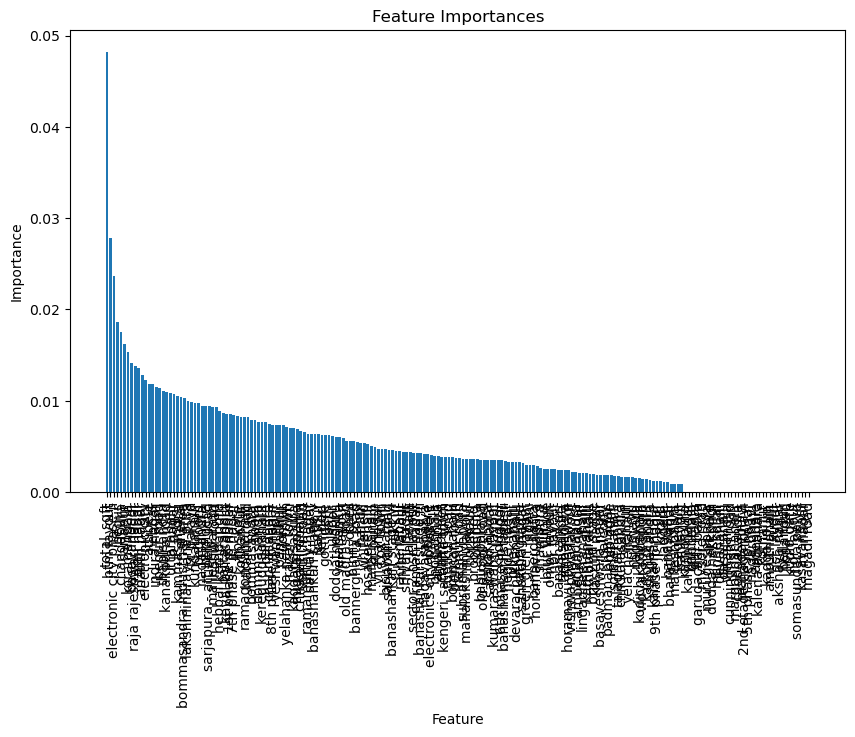

In [45]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = xgb_model_default.feature_importances_

# Create a DataFrame with feature names and their importance values
importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df_sorted['Feature'], importance_df_sorted['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


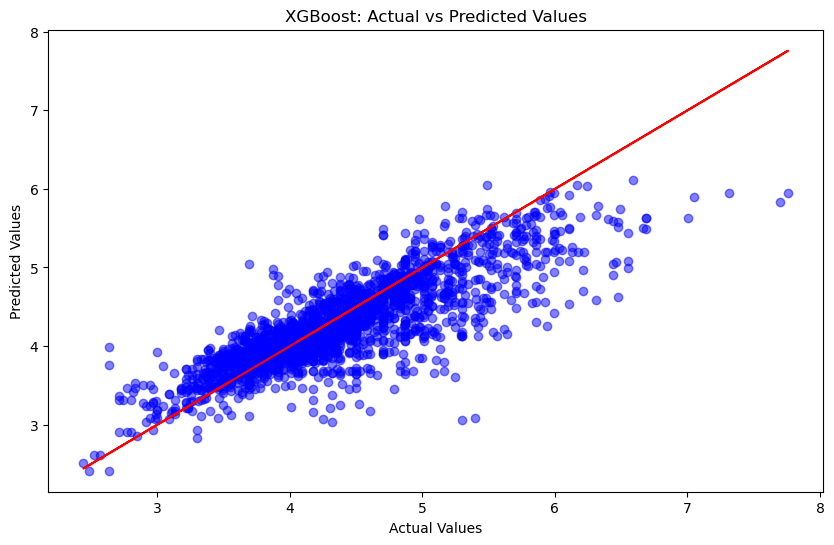

In [43]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_transformed, xgb_test_predictions, color='blue', alpha=0.5)

# Add labels and title
plt.title('XGBoost: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line for reference
plt.plot(Y_test_transformed, Y_test_transformed, color='red')

# Show plot
plt.show()


In [205]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, Y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [206]:
X_train_scaled.columns

Index(['total_sqft', 'bath', 'balcony', 'bedroom', '1st phase jp nagar',
       '2nd stage nagarbhavi', '5th phase jp nagar', '6th phase jp nagar',
       '7th phase jp nagar', '8th phase jp nagar',
       ...
       'varthur road', 'vidyaranyapura', 'vijayanagar', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yeshwanthpur'],
      dtype='object', length=200)

In [207]:
X_train_scaled.head(10)

,total_sqft,bath,balcony,bedroom,1st phase jp nagar,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,varthur road,vidyaranyapura,vijayanagar,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
12333,1500.0,2,0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114,3700.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11722,1452.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4770,1043.0,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6738,1105.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
430,1194.0,2,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12401,1300.0,3,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12208,1563.0,2,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11212,1527.0,3,2,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8833,2400.0,5,2,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
def predict_price(location, sqft, bath, balcony, bedroom):
    loc_index = np.where(X_train_scaled.columns == location)[0][0]

    x = np.zeros(len(X_train_scaled.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1
        
    # Perform prediction using the scaled feature vector x
    return np.exp(xgb_model.predict([x])[0])  # Convert back to original scale using inverse of log transformation


In [213]:
predict_price('2nd stage nagarbhavi',1000, 2, 3, 2)

44.78785

In [212]:
predict_price('indira nagar',1000, 2, 2, 2)

66.98149

In [211]:
predict_price('indira nagar',1000, 4, 2, 4)

93.38879

In [214]:
import pickle
with open('new3bangalore_house_prices_model.pickle','wb') as f:
    pickle.dump(xgb_model,f)

In [215]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_train_scaled.columns]
}
with open("new3columns.json","w") as f:
    f.write(json.dumps(columns))